
**Impoting libs and reading data bold text**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.simplefilter(action="ignore")

In [2]:
# loading the diabetes dataset to a pandas DataFrame
data = pd.read_csv('/content/stroke_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             40907 non-null  float64
 1   age                40910 non-null  int64  
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.4 MB


**Data wrangling**

In [4]:
data.isna().sum()

,0
gender,3
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [5]:
data.duplicated().sum()

0

**Adding extra column to group by age**

In [6]:
data["age_group"]=data["age"].apply(lambda x:"Infant" if (x>=0)&(x<=2)
                                  else ("Child" if (x>2)&(x<=12)
                                  else ("Adolescent"if (x>12)&(x<=18)
                                  else ("Young Adults"if (x>19)&(x<=35)
                                  else ("Middle Aged Adults" if (x>35)&(x<=60)
                                  else "Old Aged Adults")))))

In [7]:
data.groupby(["gender","ever_married","age_group"])["bmi"].mean()

gender  ever_married  age_group         
0.0     0             Adolescent            27.637500
                      Child                 29.744444
                      Infant                32.766667
                      Middle Aged Adults    28.711321
                      Old Aged Adults       28.678499
                      Young Adults          28.512176
        1             Adolescent            30.875258
                      Child                 30.390675
                      Infant                31.600000
                      Middle Aged Adults    31.015836
                      Old Aged Adults       30.651857
                      Young Adults          30.813836
1.0     0             Adolescent            28.634872
                      Child                 27.579675
                      Infant                30.062500
                      Middle Aged Adults    28.569613
                      Old Aged Adults       29.160999
                      Young Adults          28.897448
        1             Adolescent            30.392135
                      Child                 30.690701
                      Infant                30.847059
                      Middle Aged Adults    30.923185
                      Old Aged Adults       30.511409
                      Young Adults          30.837259
Name: bmi, dtype: float64

**Cleaning up the na values using mean by gender,ever_married and age group**

In [8]:
data['bmi'] = data['bmi'].fillna(data.groupby(["gender","ever_married","age_group"])["bmi"].transform('mean'))

**Checking for outliers**

In [9]:
data.describe ()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


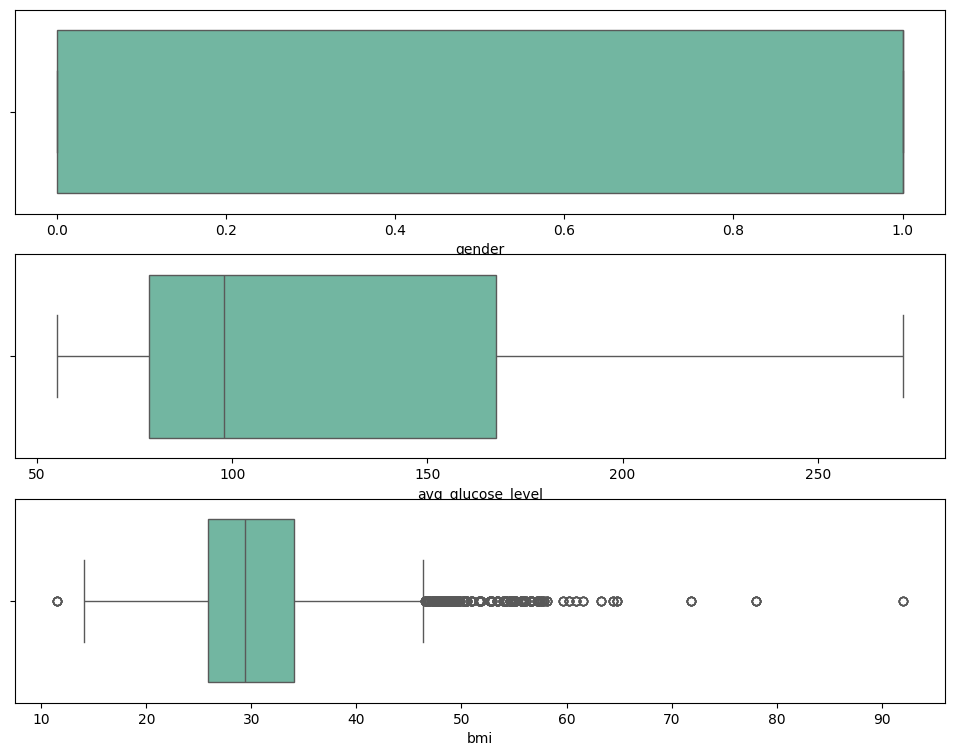

In [10]:
plt.figure(figsize=(12,9))
for i,col in enumerate(data.select_dtypes(float).columns):
    plt.subplot(3,1,i+1)
    sns.boxplot(data=data,x=col,palette =sns.color_palette("Set2"))

In [11]:
data.gender.value_counts()

,count
gender,
1.0,22710
0.0,18197


There is alot of outliers in bmi and avg glucose level However by searching online most of these values are normal so we just remove enough to be in the acceptable range


In [12]:
data = data[(data["bmi"]<66) & (data["bmi"]>12)]

In [13]:
data = data[(data["avg_glucose_level"]>56) & (data["avg_glucose_level"]<250)]

There is only one row with other gender might as well remove it

In [14]:
data=data.drop(data[data["gender"]=="Other"].index)

In [15]:
data.shape

(40028, 12)

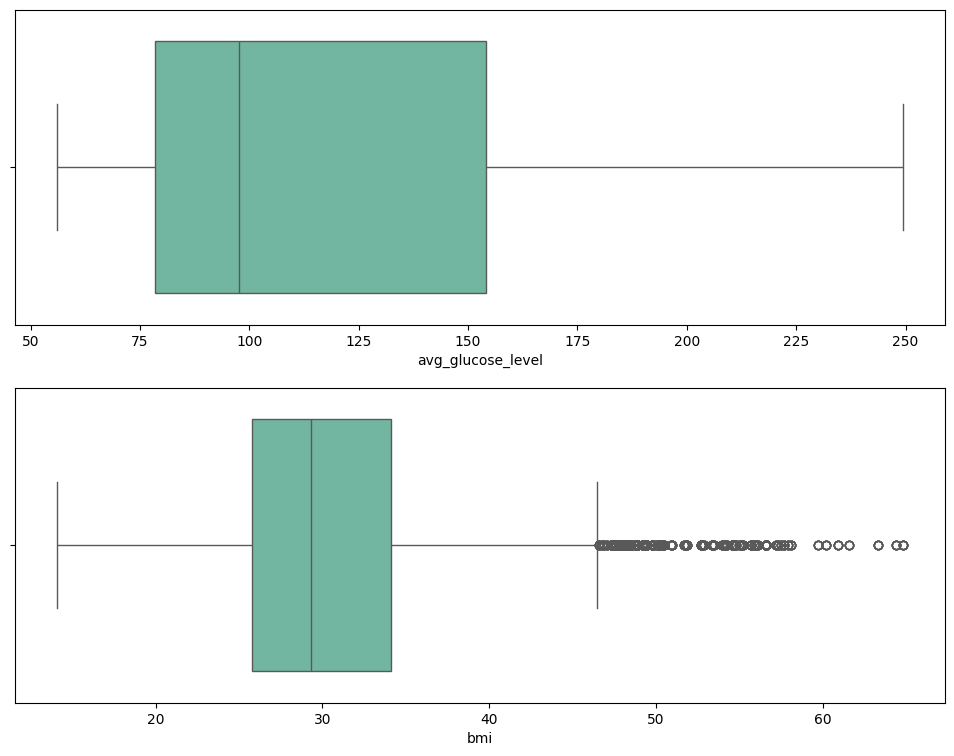

In [16]:
plt.figure(figsize=(12,9))
for i,col in enumerate(data.select_dtypes(float).columns[1:]):
    plt.subplot(2,1,i+1)
    sns.boxplot(data=data,x=col,palette =sns.color_palette("Set2"))

*italicized text*### * There is still outliers however removing these will be considered loss of information since these are true outliers

**Univariate Analysis**

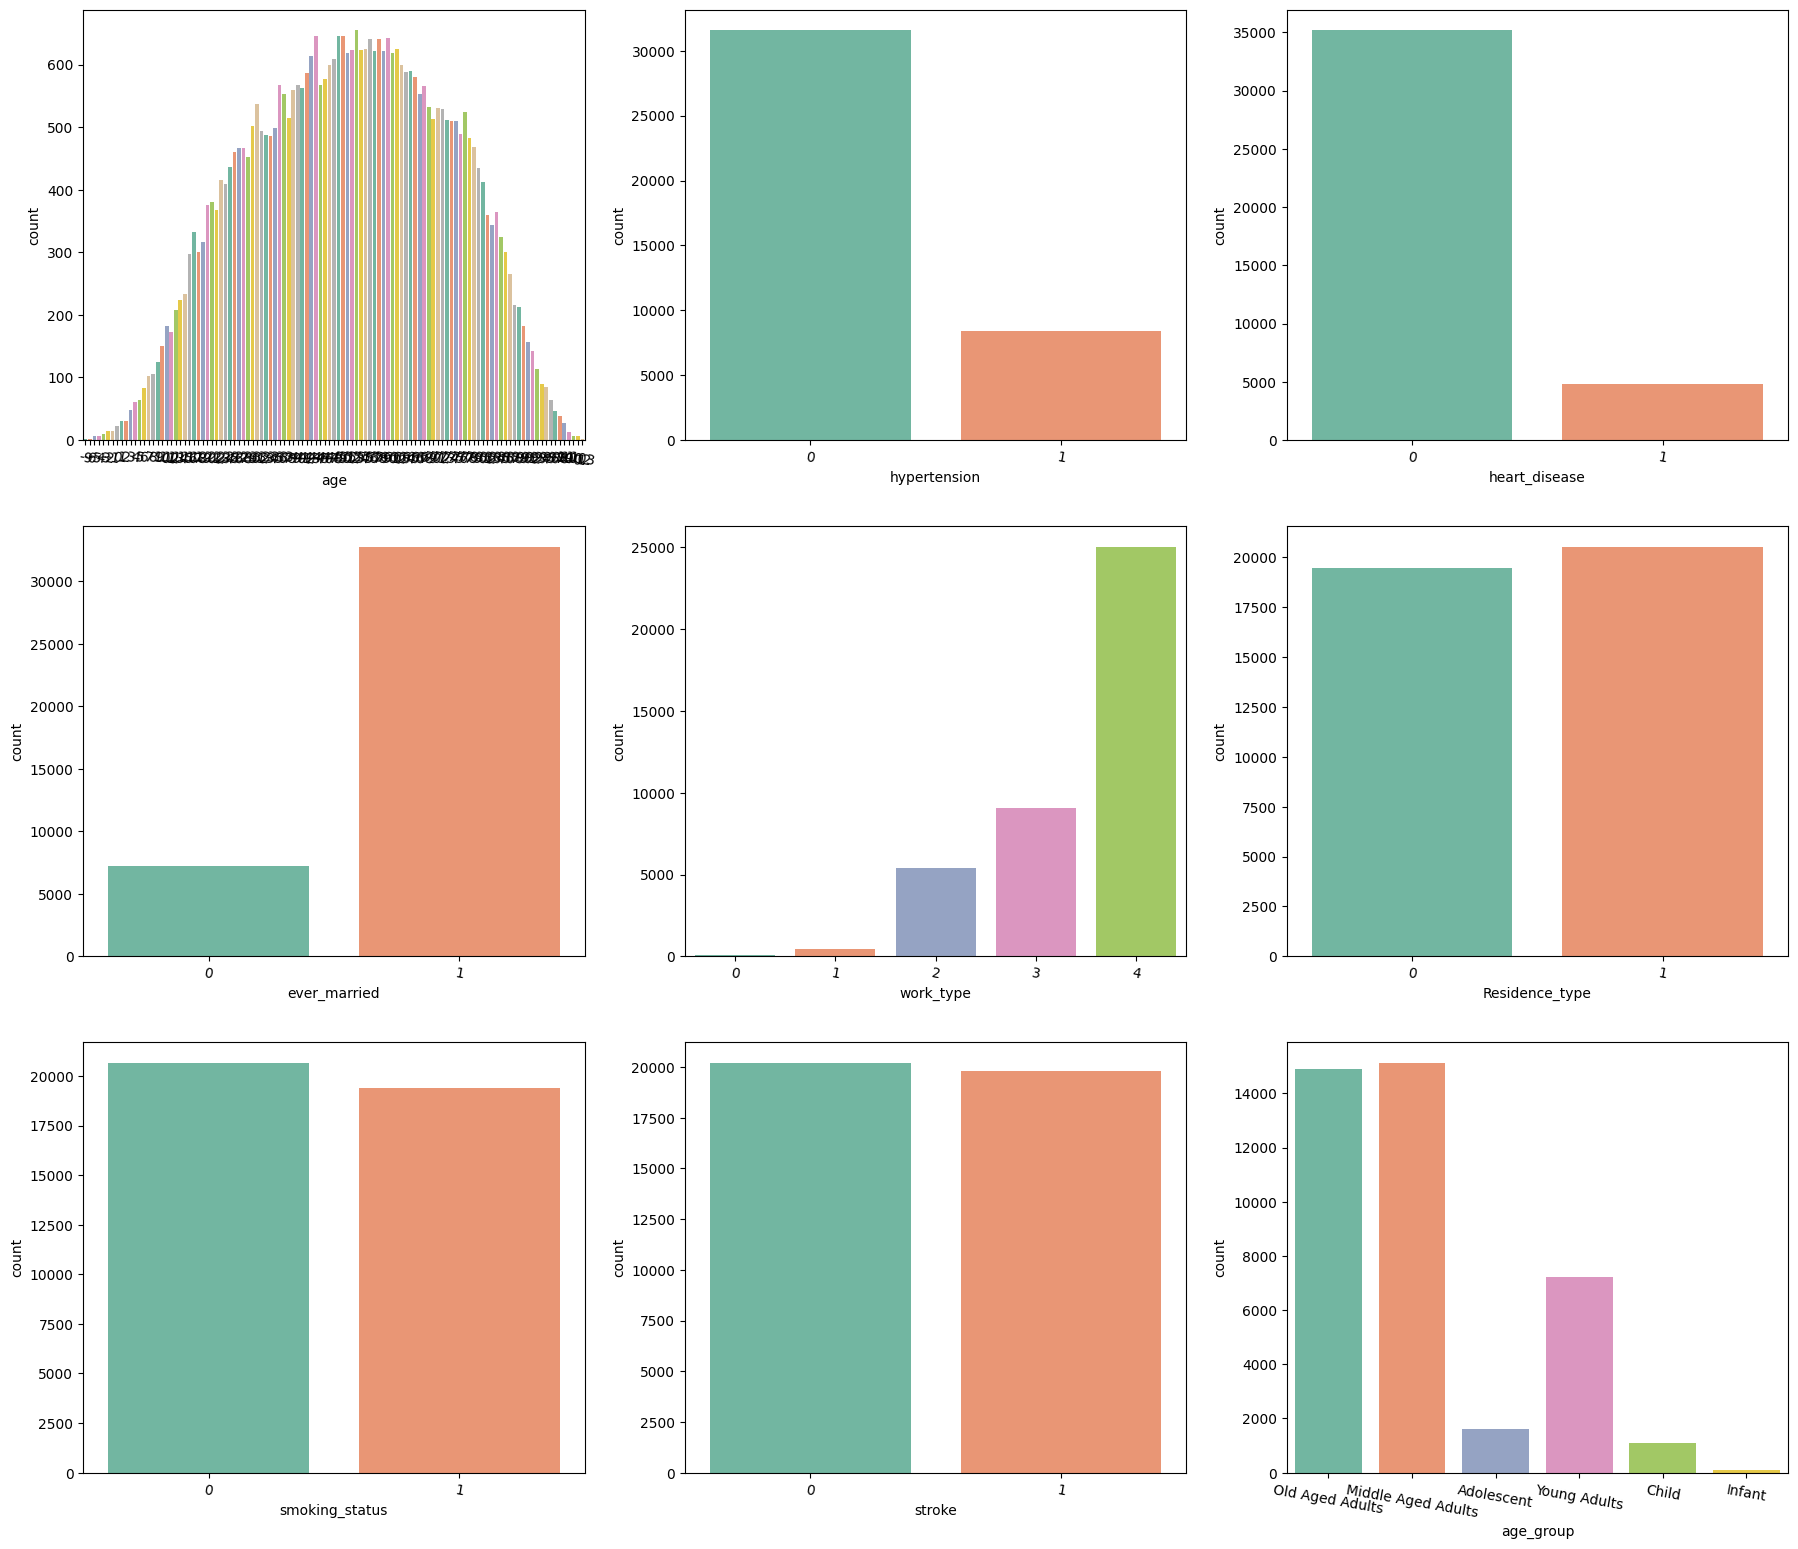

In [17]:
plt.figure(figsize=(22,19))
for i,col in enumerate(data.select_dtypes(exclude=float).columns):
    plt.subplot(3,3,i+1)
    sns.countplot(data=data,x=col,palette =sns.color_palette("Set2"))
    plt.xticks(rotation=-10)

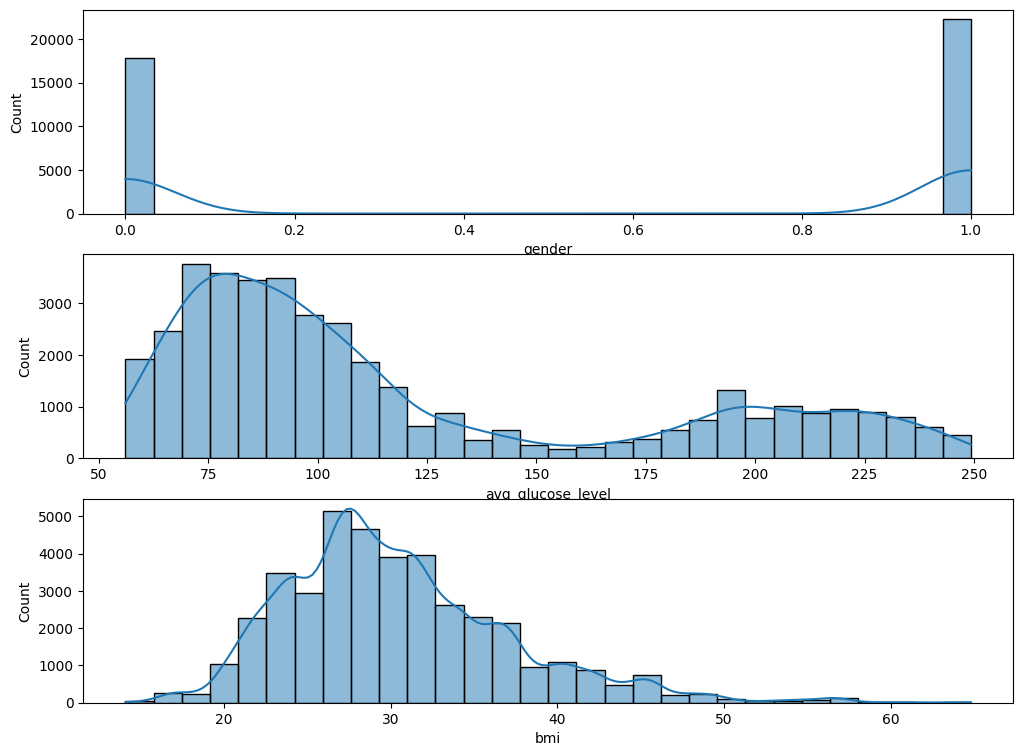

In [18]:
plt.figure(figsize=(12,9))
for i,col in enumerate(data.select_dtypes(float).columns):
    plt.subplot(3,1,i+1)
    sns.histplot(data=data,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))

## **Multivariate Analysis**

## Does gender affect having a stroke?

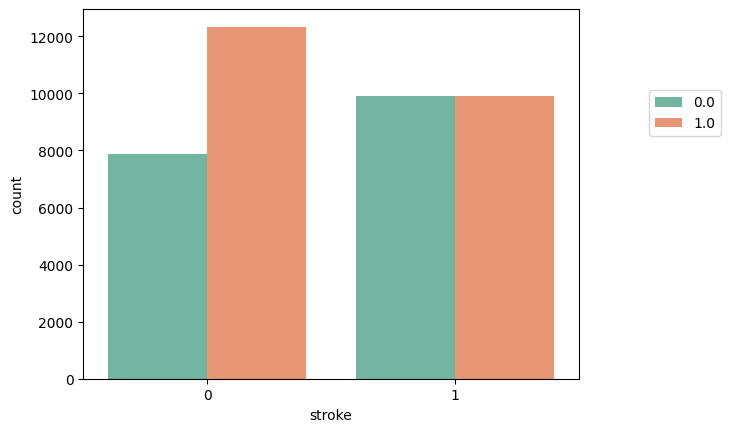

In [19]:
sns.countplot(data,x="stroke",hue="gender",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.3,0.8))

#### * No Gender has no relation

## Does age affect having a stroke?

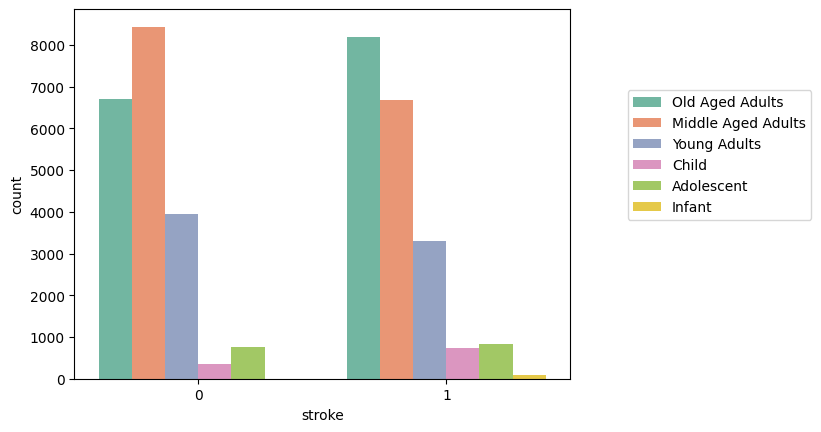

In [20]:
sns.countplot(data,x="stroke",hue="age_group",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.5,0.8))

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

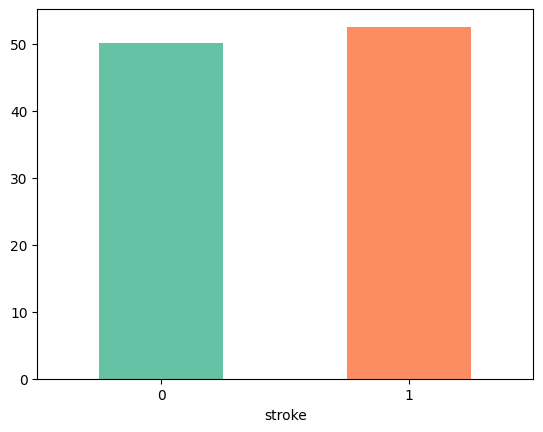

In [21]:
data.groupby("stroke")["age"].mean().plot(kind="bar",color = sns.color_palette("Set2"))
plt.xticks(rotation=0)

#### * Yes, stroke only happened in older people mainly old aged and middle aged adults

## Does work type affect having a stroke?

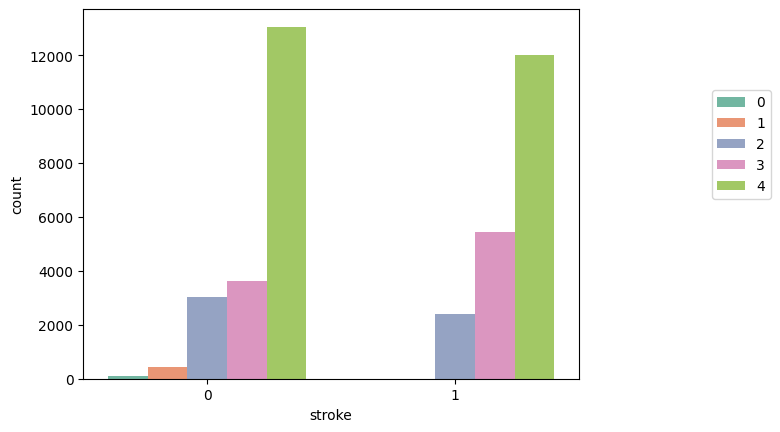

In [22]:
sns.countplot(data,x="stroke",hue="work_type",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.4,0.8))

#### * Yes but not by much, stroke happened more in private work than any other

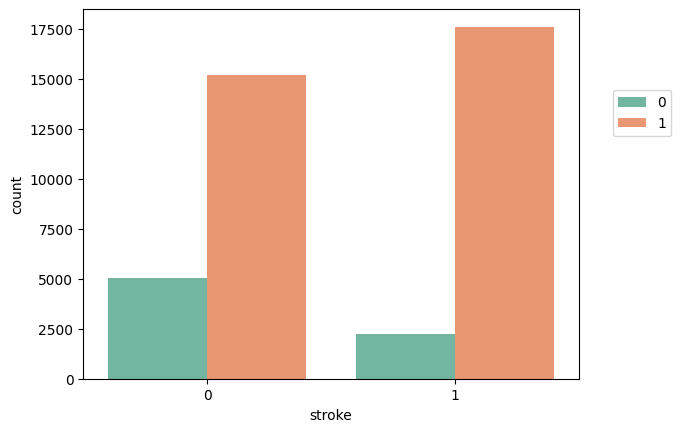

In [23]:
sns.countplot(data,x="stroke",hue="ever_married",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.2,0.8))

## Does smoking affect having a stroke?

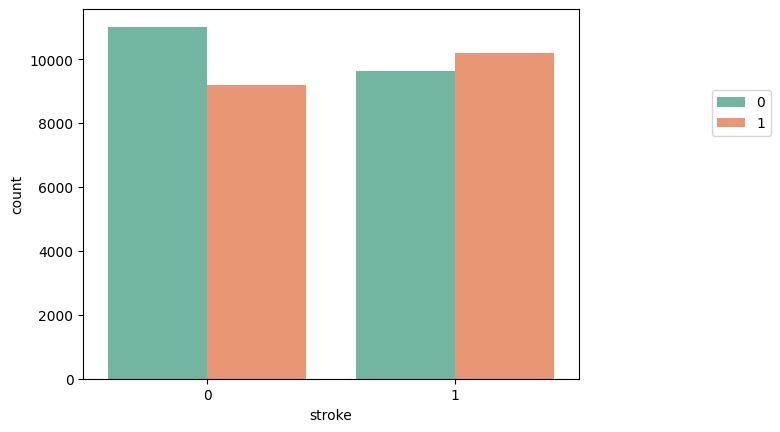

In [24]:
sns.countplot(data,x="stroke",hue="smoking_status",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.4,0.8))

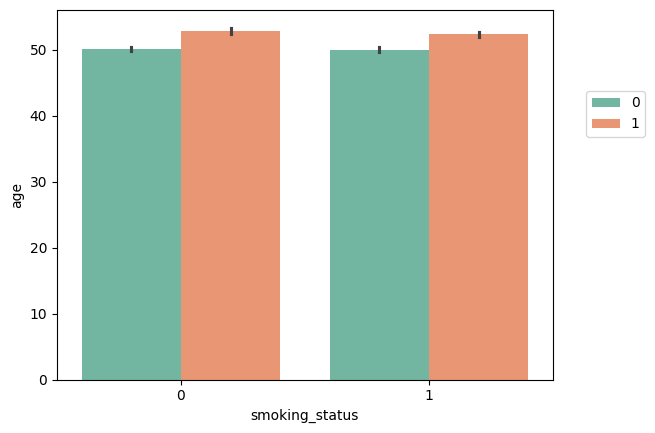

In [25]:
sns.barplot(data=data,x="smoking_status",y="age",hue="stroke",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.2,0.8))

#### * As seen above , people who never smoked and those who formerly smoked had the most strokes however when looking at age, the age of these 2 was higher than others so it could be attributed to age rather than smoking status

## Does hypertension affect having a stroke?

In [26]:
pd.crosstab(data.stroke,data.hypertension)

hypertension,0,1
stroke,,
0,18042,2160
1,13548,6278


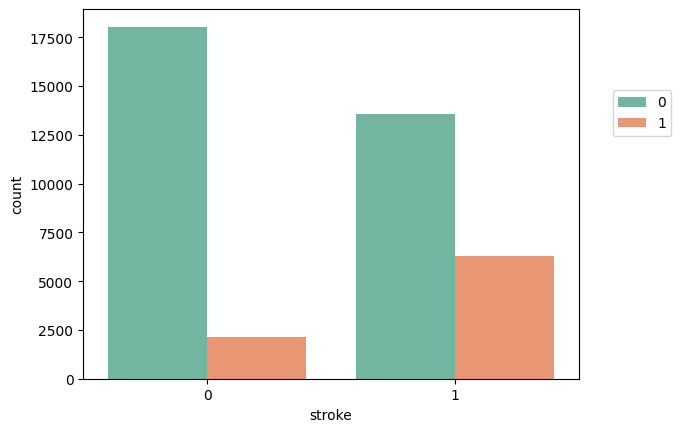

In [27]:
sns.countplot(data,x="stroke",hue="hypertension",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.2,0.8))

#### * Yes but not by much, people who have hypertension had more strokes

## Average bmi of people who had a stroke vs those who hasn't

In [28]:
data.groupby("stroke")["bmi"].mean()

,bmi
stroke,
0,30.259415
1,30.486452


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

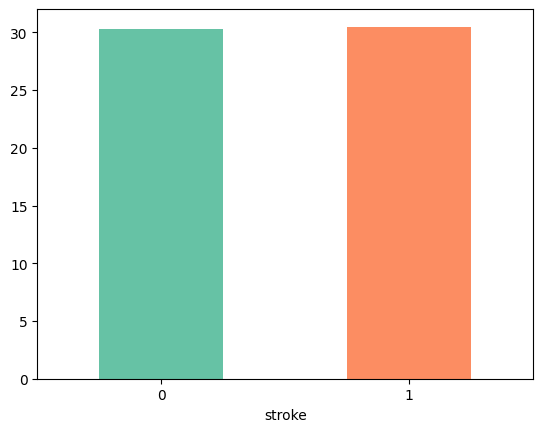

In [29]:
data.groupby("stroke")["bmi"].mean().plot(kind="bar",color =sns.color_palette("Set2"))
plt.xticks(rotation=0)

#### * Mostly the same with a slight increase in those who had a stroke at 30.3 vs those who hasn't at 28.8

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

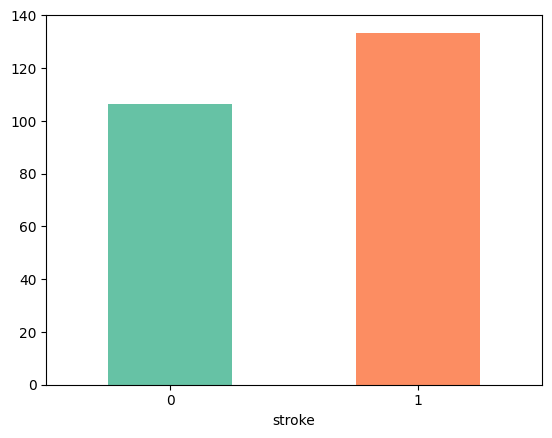

In [30]:
data.groupby("stroke")["avg_glucose_level"].mean().plot(kind="bar",color =sns.color_palette("Set2"))
plt.xticks(rotation=0)

# Importing libs for machine learning and transforming data

In [31]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import resample

## Correlation between data attributes

In [32]:
corr_data =data.copy()
encoder  =LabelEncoder()
for col in corr_data.select_dtypes(include="object").columns:
    corr_data[col] =encoder.fit_transform(corr_data[col])

<Axes: >

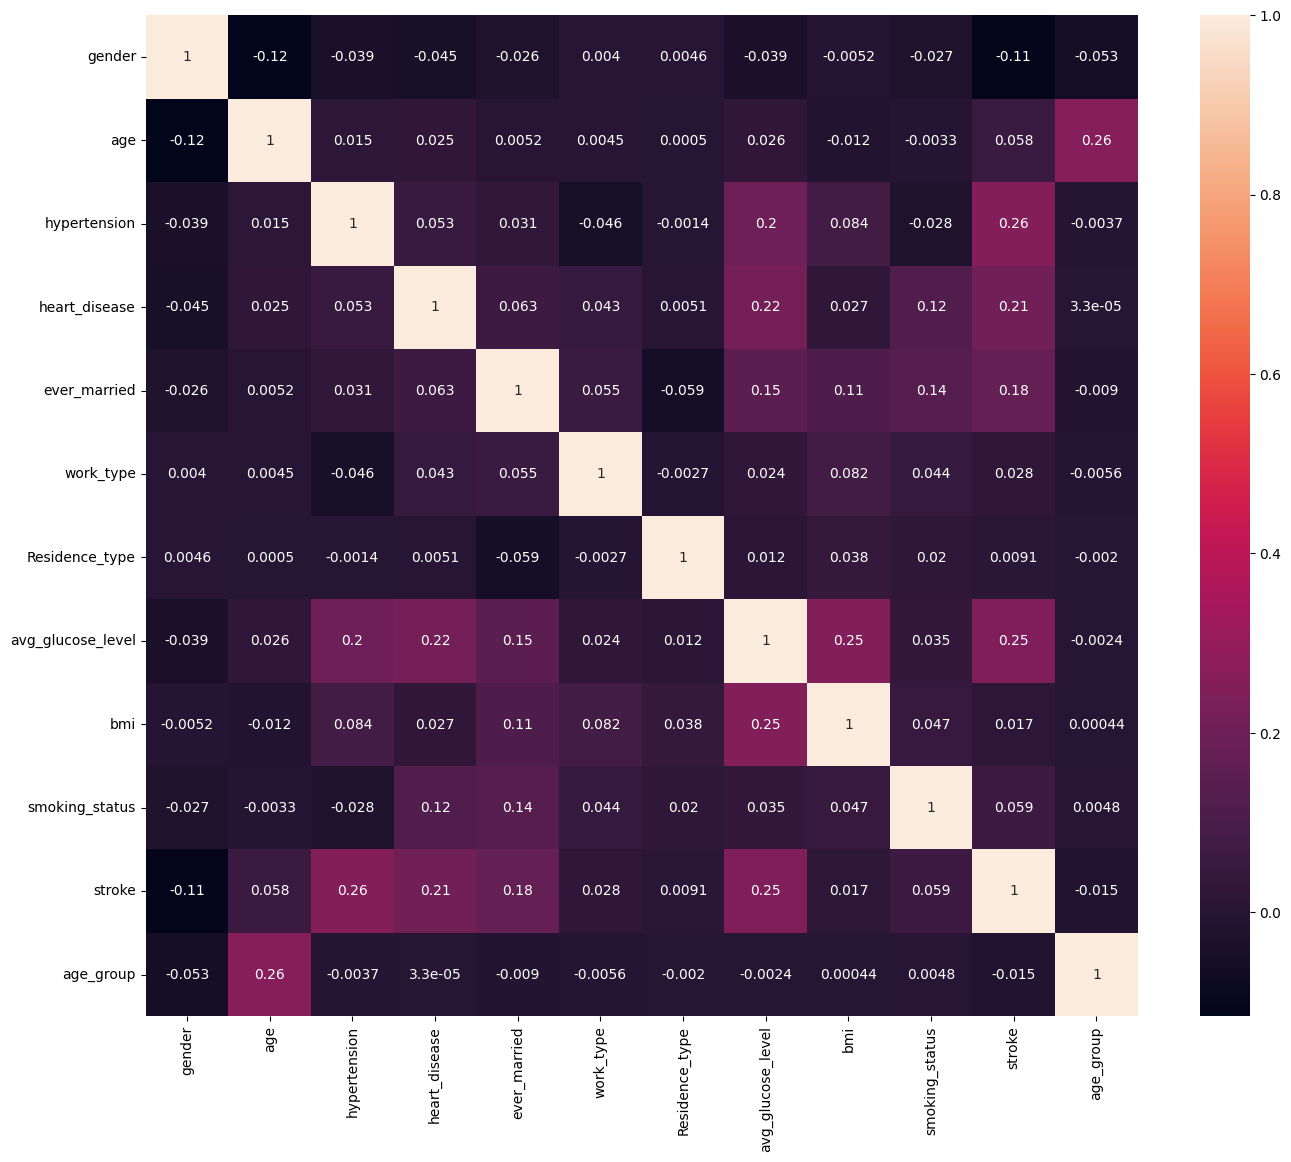

In [33]:
plt.figure(figsize=(16,13))
sns.heatmap(data=corr_data.corr(),annot=True)

## Upsampling the data

In [34]:
had_stroke = data[data["stroke"]==1]
no_stroke = data[data["stroke"]==0]
upsampled_had_stroke = resample(had_stroke,replace=True , n_samples=no_stroke.shape[0] , random_state=123 )
upsampled_data = pd.concat([no_stroke,upsampled_had_stroke])

<Axes: ylabel='count'>

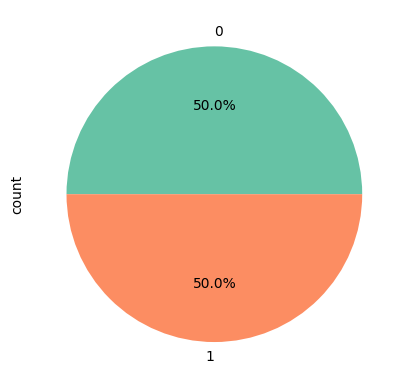

In [35]:
upsampled_data.stroke.value_counts().plot(kind = "pie",autopct="%0.1f%%",colors =sns.color_palette("Set2"))

In [36]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_group'],
      dtype='object')

# Encoding nominal data using pd dummies and ordinal using label encoder

In [37]:
cols = ['gender','hypertension','heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status']
dums = pd.get_dummies(upsampled_data[cols],dtype=int)
model_data = pd.concat([upsampled_data,dums],axis=1).drop(columns=cols)

In [38]:
encoder = LabelEncoder()
model_data["age_group"] = encoder.fit_transform(model_data["age_group"])

# Normalizing the data using min max scaler

In [39]:
scaler = MinMaxScaler()
for col in ['age','avg_glucose_level','bmi']:
    scaler.fit(model_data[[col]])
    model_data[col]=scaler.transform(model_data[[col]])

In [40]:
model_data

,age,avg_glucose_level,bmi,stroke,age_group
20460,0.801802,0.165028,0.495069,0,4
20461,0.459459,0.067119,0.429980,0,3
20462,0.504505,0.111364,0.071006,0,3
20463,0.531532,0.970089,0.254438,0,3
20464,0.459459,0.111778,0.358974,0,3
...,...,...,...,...,...
7679,0.522523,0.262213,0.372781,1,3
10683,0.576577,0.092890,0.214990,1,3
1938,0.747748,0.085904,0.291913,1,4
711,0.747748,0.117626,0.299803,1,4


# Splitting the data and initalzing models

In [41]:
X = model_data.drop(columns="stroke")
y = model_data["stroke"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

In [42]:
etc_model = ExtraTreesClassifier()
rfc_model = RandomForestClassifier(n_estimators=29,max_leaf_nodes=900,max_features=0.8,criterion="entropy")
xgb_model = XGBClassifier(objective="binary:logistic",eval_metric = "auc")
gbc_model = GradientBoostingClassifier(max_depth=29,min_samples_leaf=4,min_samples_split=13,subsample=0.8)

models = [etc_model,rfc_model,xgb_model,gbc_model]

# Training models and evaluating

In [43]:
for model in models:
    model.fit(X_train,y_train)

In [44]:
for model in models:
    model_name = type(model).__name__
    print(f"score for {model_name} on train data: {model.score(X_train,y_train)}")

score for ExtraTreesClassifier on train data: 1.0
score for RandomForestClassifier on train data: 0.9999690622776352
score for XGBClassifier on train data: 0.9893883612288463
score for GradientBoostingClassifier on train data: 1.0


In [45]:
for model in models:
    model_name = type(model).__name__
    print(f"score for {model_name} on test data: {model.score(X_test,y_test)}")

score for ExtraTreesClassifier on test data: 0.9662170523450068
score for RandomForestClassifier on test data: 0.9966588293528029
score for XGBClassifier on test data: 0.9865115703502042
score for GradientBoostingClassifier on test data: 0.998391288206905


## Classification report for each model

In [46]:
for model in models:
    y_predicted = model.predict(X_test)
    model_name = type(model).__name__
    print(f"Report:{model_name}")
    print(classification_report(y_test,y_predicted))


Report:ExtraTreesClassifier
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4062
           1       0.96      0.98      0.97      4019

    accuracy                           0.97      8081
   macro avg       0.97      0.97      0.97      8081
weighted avg       0.97      0.97      0.97      8081

Report:RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4062
           1       0.99      1.00      1.00      4019

    accuracy                           1.00      8081
   macro avg       1.00      1.00      1.00      8081
weighted avg       1.00      1.00      1.00      8081

Report:XGBClassifier
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4062
           1       0.97      1.00      0.99      4019

    accuracy                           0.99      8081
   macro avg       0.99      0.99      0.99      

## Validation using kfold cross validation

In [47]:
print("scores of each model using kfold validation:-\n\n")
for model in models:
    score = cross_val_score(model,X,y,cv=10)
    avg = np.mean(score)
    model_name = type(model).__name__
    print(f"scores for {model_name}:{score}")
    print(f"average score for {model_name}:{avg}\n")

scores of each model using kfold validation:-


scores for ExtraTreesClassifier:[0.97055184 0.97079931 0.96782975 0.96906706 0.96831683 0.96831683
 0.9720297  0.97079208 0.96980198 0.9710396 ]
average score for ExtraTreesClassifier:0.9698544988129102

scores for RandomForestClassifier:[0.99703044 0.99604058 0.99529819 0.99505073 0.9960396  0.99777228
 0.9950495  0.99554455 0.99653465 0.99579208]
average score for RandomForestClassifier:0.9960152618825356

scores for XGBClassifier:[0.98911161 0.98812175 0.99034892 0.98564712 0.98613861 0.99009901
 0.98712871 0.98514851 0.98935644 0.98762376]
average score for XGBClassifier:0.9878724448168648

scores for GradientBoostingClassifier:[0.99851522 0.99678297 0.99851522 0.99851522 0.9980198  0.99826733
 0.99826733 0.99925743 0.99876238 0.99851485]
average score for GradientBoostingClassifier:0.9983417740437741



## Confusion matrices for the models

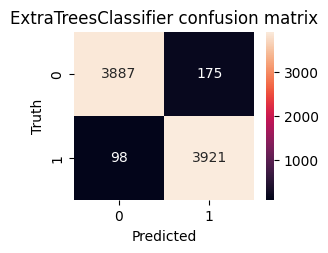

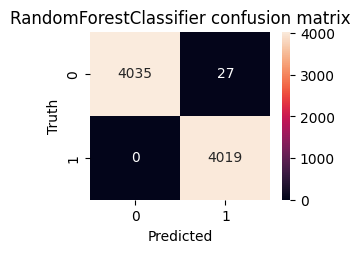

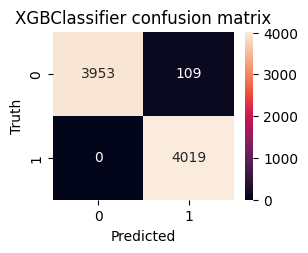

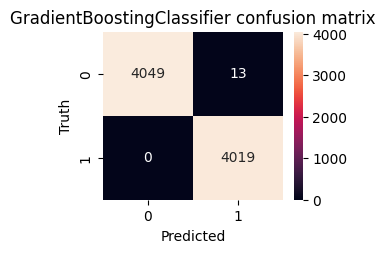

In [48]:
for i,model in enumerate(models):
    plt.subplot(2,2,i+1)
    y_predicted = model.predict(X_test)
    model_name = type(model).__name__
    cm = confusion_matrix(y_test, y_predicted)
    sns.heatmap(cm, annot=True,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f"{model_name} confusion matrix")
    plt.show()

In [49]:


import pickle


filename = 'stroke_model.sav'
pickle.dump(model, open(filename, 'wb'))


# loading the saved model
loaded_model = pickle.load(open('stroke_model.sav', 'rb'))


for column in X.columns:
  print(column)



age
avg_glucose_level
bmi
age_group


In [52]:
for column in X.columns:
  print(column)


age
avg_glucose_level
bmi
age_group


In [51]:
print(data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_group'],
      dtype='object')
